# Introduction

The accurate policy evalutation is important: if the expected return (i.e., sum of future rewards) given a particular policy cannot be correctly evaluated, then policy would not be able to improve (Sutton and Barto, Chapter $4$).  

The naive value function assumes all agents follow a **static** joint policy in the future. 
This assumption is often violated in multiagent settings as the other agents are also learning agents, so they have **non-stationary** policies in the future.  

Consequently, we empirically prove in this notebook that the naive value function fails to estimate the expected reutrn accurately, and further show that **if an agent considers further future policies of its peers, then the agent has more accurate policy evaluation**.

# Experiment Overview

## Domain

The hallway environment (refer to LeCTR) with $2$ agents is considered for the experiment:  
* There are $n$ states in the domain.
* Each agent has $2$ actions: whether to move right/left at each state.
* Agents receive +1 if and only if one agent is at the beginning of the hallway and the other agent is located at the end of the hallway. Then, the game terminates (i.e., terminal state).
* Otherwise, agents receive +0.

## Policy

* Agent $1$ has a random policy: selects either action with probability of $0.5$.
* Agent $2$ has a time-varying policy: $p(a^{2}_{t}=Left)$ and $p(a^{2}_{t}=Right)$ linearly decreases and increases, respectively, over time.

## Comparisons:

* **True** return: Monte-carlo sampling is applied with many independent runs (e.g., $100$ runs), which closely approximate the true return with many samples.

* Naive learning: $V^{1}_{\pi_{t}}(s_{t})=\sum_{{a_t}\in\mathcal{A}}\pi_{t}^{1}(a^{1}_{t}|s_{t})\pi^2_{t}(a^2_{t}|s_{t})\sum_{s_{t+1}\in\mathcal{S}}\mathcal{T}(s_{t+1}|s_{t},a_{t})\Big[R^1(s_{t},a^{i}_{t})+\gamma V^{1}_{\pi_t}(s_{t+1})\Big]$

* Ours (1-step look-ahead): $V^{1}_{\pi_{t}}(s_{t})=\sum_{{a_t}\in\mathcal{A}}\pi^{1}_{t}(a^{1}_{t}|s_{t})\pi^{2}_{t}(a^{2}_{t}|s_{t})\sum_{s_{t+1}\in\mathcal{S}}\mathcal{T}(s_{t+1}|s_{t},a_{t})\Bigg[R^1(s_{t},a_{t})+\gamma \Bigg[\sum_{{a_{t+1}}\in\mathcal{A}}\pi^{1}_{t+1}(a^1_{t+1}|s_{t+1})\pi^{2}_{t+1}(a^{2}_{t+1}|s_{t+1})\sum_{s_{t+2}\in\mathcal{S}}\mathcal{T}(s_{t+2}|s_{t+1},a_{t+1})\Big[R^{1}(s_{t+1},a_{t+1})+\gamma V^{1}_{\pi_{t+1}}(s_{t+2})\Bigg]\Bigg]$

* Ours (2-step look-ahead): $V^{1}_{\pi_{t}}(s_{t})=\sum_{{a_t}\in\mathcal{A}}\pi^{1}_{t}(a^{1}_{t}|s_{t})\pi^{2}_{t}(a^{2}_{t}|s_{t})\sum_{s_{t+1}\in\mathcal{S}}\mathcal{T}(s_{t+1}|s_{t},a_{t})\Bigg[R^1(s_{t},a_{t})+\gamma \Bigg[\sum_{{a_{t+1}}\in\mathcal{A}}\pi^{1}_{t+1}(a^1_{t+1}|s_{t+1})\pi^{2}_{t+1}(a^{2}_{t+1}|s_{t+1})\sum_{s_{t+2}\in\mathcal{S}}\mathcal{T}(s_{t+2}|s_{t+1},a_{t+1})\Bigg[R^{1}(s_{t+1},a_{t+1})+\gamma \Big[\sum_{{a_{t+2}}\in\mathcal{A}}\pi^{1}_{t+2}(a^1_{t+2}|s_{t+2})\pi^{2}_{t+2}(a^{2}_{t+2}|s_{t+2})\sum_{s_{t+3}\in\mathcal{S}}\mathcal{T}(s_{t+3}|s_{t+2},a_{t+2})\Big[R^{1}(s_{t+2},a_{t+2})+\gamma V^{1}_{\pi_{t+2}}(s_{t+3})\Big]\Big]\Bigg]\Bigg]$

* Ours (N-step look-ahead): Continue to replace the value function on the right hand side with N-future policies

## Assumptions
As dynamic programming is used to do the policy evaluation, the followings are assummed:
* Access to a model of an environment: state space, action space, transition function, reward function
* Access to opponent's policy and its future policies

# Result

Please run *_train.sh* which will automatically run and save results in the "data/" folder.

## Visualization of true return

In [1]:
%matplotlib inline

In [2]:
# Setup path
import os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))

# Import libraries
import numpy as np
from misc.vis import vis

# Setup seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
sns.set_style("whitegrid")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 14}
plot.rcParams.update(params)

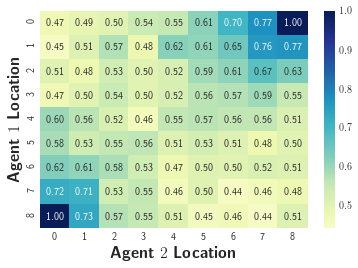

In [3]:
# Read true return (montecarlo) data
true_return = np.load("../data/montecarlo_100.npy")
sns.set_style("white")
vis(true_return)
plt.savefig("decay_100_gt.pdf", bbox_inches="tight")

## Difference compared to the ground-truth (decay = 100)
We perform dynamic programming for each method, train until converges, and then compare to the true return.


Naive diff: 1.91077
Ours diff : 1.90692 at lookahead 1
Ours diff : 1.89932 at lookahead 2
Ours diff : 1.88655 at lookahead 3
Ours diff : 1.86871 at lookahead 4
Ours diff : 1.84578 at lookahead 5
Ours diff : 1.81791 at lookahead 6
Ours diff : 1.78509 at lookahead 7
Ours diff : 1.74743 at lookahead 8
Ours diff : 1.70497 at lookahead 9
Ours diff : 1.65782 at lookahead 10
Ours diff : 1.60605 at lookahead 11


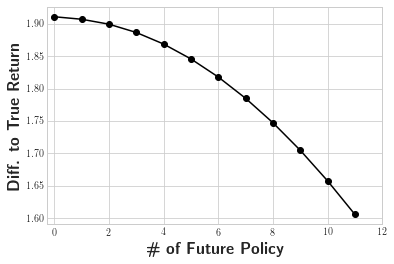

In [4]:
# Naive comparison
naive = np.load("../data/naive_100.npy")
naive_diff = np.sum((true_return - naive).flatten())
print("Naive diff: {:.5f}".format(naive_diff))

# Ours comparison
ours_diffs = []
N = 12  # Number of lookahead available in data
n_lookaheads = [n for n in range(1, N)]
for n in n_lookaheads:
    ours = np.load("../data/ours_100_" + str(n) + ".npy")
    ours_diff = np.sum((true_return - ours).flatten())
    print("Ours diff : {:.5f} at lookahead {}".format(ours_diff, n))
    ours_diffs.append(ours_diff)
    
# Plot
diffs = [naive_diff] + ours_diffs

sns.set_style("whitegrid")
plt.plot(diffs, "ko-")
plt.xlabel(r'\textbf{\# of Future Policy}', size=16)
plt.ylabel(r'\textbf{Diff. to True Return}', size=16)
plt.xlim([-0.25, N])
plt.savefig("decay_100_result.pdf", bbox_inches="tight")

## Difference compared to the ground-truth (decay = 25)
We perform dynamic programming for each method, train until converges, and then compare to the true return.


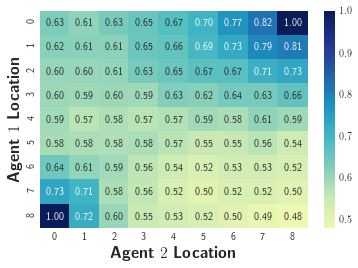

In [5]:
# Read true return (montecarlo) data
true_return = np.load("../data/montecarlo_25.npy")
sns.set_style("white")
vis(true_return)
plt.savefig("decay_25_gt.pdf", bbox_inches="tight")

Naive diff: 6.43817
Ours diff : 6.39724 at lookahead 1
Ours diff : 6.27723 at lookahead 2
Ours diff : 6.07971 at lookahead 3
Ours diff : 5.81270 at lookahead 4
Ours diff : 5.48363 at lookahead 5
Ours diff : 5.10430 at lookahead 6
Ours diff : 4.68391 at lookahead 7
Ours diff : 4.23502 at lookahead 8
Ours diff : 3.76635 at lookahead 9
Ours diff : 3.28932 at lookahead 10


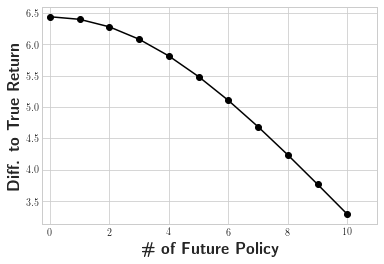

In [6]:
# Naive comparison
naive = np.load("../data/naive_25.npy")
naive_diff = np.sum((true_return - naive).flatten())
print("Naive diff: {:.5f}".format(naive_diff))

# Ours comparison
ours_diffs = []
N = 11
n_lookaheads = [n for n in range(1, 11)]
for n in n_lookaheads:
    ours = np.load("../data/ours_25_" + str(n) + ".npy")
    ours_diff = np.sum((true_return - ours).flatten())
    print("Ours diff : {:.5f} at lookahead {}".format(ours_diff, n))
    ours_diffs.append(ours_diff)
    
# Plot
diffs = [naive_diff] + ours_diffs

sns.set_style("whitegrid")
plt.plot(diffs, "ko-")
plt.xlabel(r'\textbf{\# of Future Policy}', size=16)
plt.ylabel(r'\textbf{Diff. to True Return}', size=16)
plt.xlim([-0.25, N])
plt.savefig("decay_25_result.pdf", bbox_inches="tight")